In [67]:
import pandas as pd
import matplotlib.pyplot as plt

In [68]:
# read the data from the first CSV file
unemployment_data1 = pd.read_csv("Datasets/Unemployment in India.csv")

# read the data from the second CSV file
unemployment_data2 = pd.read_csv("Datasets/Unemployment_Rate_upto_11_2020.csv")

In [69]:
unemployment_data1

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
749,West Bengal,29-02-2020,Monthly,7.55,10871168.0,44.09,Urban
750,West Bengal,31-03-2020,Monthly,6.67,10806105.0,43.34,Urban
751,West Bengal,30-04-2020,Monthly,15.63,9299466.0,41.20,Urban
752,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,Urban


In [70]:
unemployment_data2

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.740
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.740
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.740
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.740
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.740
...,...,...,...,...,...,...,...,...,...
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855


In [71]:
print(unemployment_data1.columns)

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')


In [72]:
# merge the two datasets based on the common columns
unemployment_data = pd.merge(unemployment_data1, unemployment_data2, on=["Region", "Date"])
unemployment_data.columns

Index(['Region', 'Date', 'Frequency_x', 'Estimated Unemployment Rate (%)_x',
       'Estimated Employed_x', 'Estimated Labour Participation Rate (%)_x',
       'Area', 'Frequency_y', 'Estimated Unemployment Rate (%)_y',
       'Estimated Employed_y', 'Estimated Labour Participation Rate (%)_y',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

In [73]:
# drop unnecessary columns
unemployment_data.drop(["Frequency_x", "Frequency_y", "Estimated Employed_x", "Estimated Employed_y",
                        "Estimated Labour Participation Rate (%)_x", "Region", "longitude", "latitude"], 
                       axis=1, inplace=True)

In [74]:
# rename the columns for consistency
unemployment_data.rename(columns={"Estimated Unemployment Rate (%)_x": "Estimated Unemployment Rate (%)",
                                  "Estimated Labour Participation Rate (%)_y": "Estimated Labour Participation Rate (%)"}, 
                         inplace=True)

In [75]:
# fill missing values with the mean of each column
unemployment_data.fillna(unemployment_data.select_dtypes(include='number').mean(), inplace=True)

In [76]:
# convert the "Date" column to a datetime format
unemployment_data["Date"] = pd.to_datetime(unemployment_data["Date"])

In [77]:
# set the "Date" column as the index
unemployment_data.set_index("Date", inplace=True)

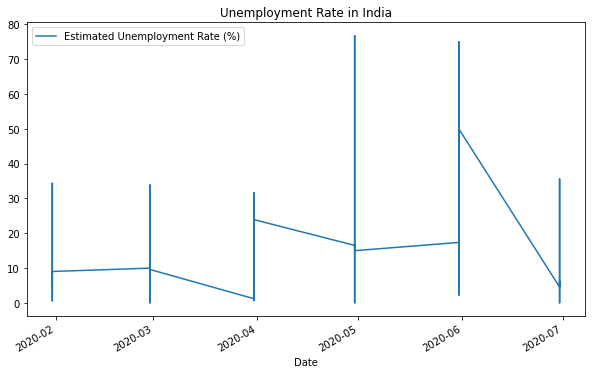

In [78]:
# plot the unemployment rate over time
unemployment_data.plot(y="Estimated Unemployment Rate (%)", figsize=(10, 6), title="Unemployment Rate in India")
# show the plot
plt.show()

In [79]:
# calculate the mean, minimum, maximum, and standard deviation of the unemployment rate
mean_unemployment_rate = unemployment_data["Estimated Unemployment Rate (%)"].mean()
min_unemployment_rate = unemployment_data["Estimated Unemployment Rate (%)"].min()
max_unemployment_rate = unemployment_data["Estimated Unemployment Rate (%)"].max()
std_unemployment_rate = unemployment_data["Estimated Unemployment Rate (%)"].std()

In [80]:
# print the summary statistics
print("Summary Statistics of Unemployment Rate in India:")
print(f"Mean: {mean_unemployment_rate:.2f}")
print(f"Minimum: {min_unemployment_rate:.2f}")
print(f"Maximum: {max_unemployment_rate:.2f}")
print(f"Standard Deviation: {std_unemployment_rate:.2f}")

Summary Statistics of Unemployment Rate in India:
Mean: 15.09
Minimum: 0.00
Maximum: 76.74
Standard Deviation: 13.62


In [81]:
# calculate the mean unemployment rate by region
mean_unemployment_rate_by_region = unemployment_data.groupby("Region.1")["Estimated Unemployment Rate (%)"].mean()

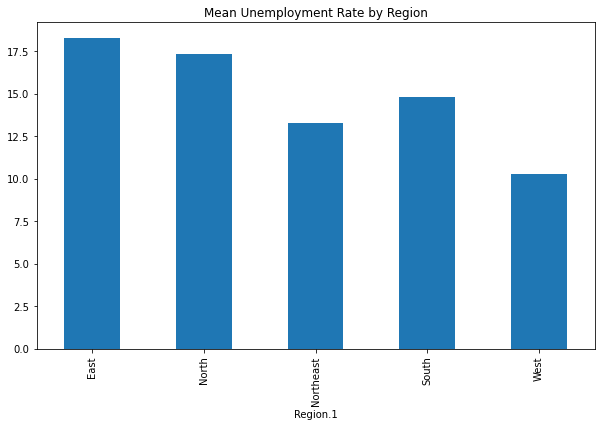

In [82]:
# plot the mean unemployment rate by region
mean_unemployment_rate_by_region.plot(kind="bar", figsize=(10, 6), title="Mean Unemployment Rate by Region")

# show the plot
plt.show()